<a href="https://colab.research.google.com/github/Lawyerd/machine_learning_basic/blob/main/5_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt

keras.__version__

'2.5.0'

In [ ]:
# Data set 생성
# X = 나이, T = 키
np.random.seed(seed=1)
X_min=4
X_max=30
X_n=16
X = 5 + 25 * np.random.rand(X_n)
Prm_c=[170,108,0.2]
T=Prm_c[0]-Prm_c[1] * np.exp(-Prm_c[2]*X) + 4 * np.random.randn(X_n)
np.savez('ch_data.npz',X=X,X_min=X_min, X_max=X_max, X_n = X_n, T = T)
print("X =",X)
print("T =",T)

X = [15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]
T = [170.91013145 160.67559882 129.00206616 159.70139552 155.46058905
 140.56134369 153.65466385 159.42939554 164.70423898 169.64527574
 160.71257522 173.28709855 159.31193249 171.51757345 138.9570433
 165.8744074 ]


## `5.1` 1차원 입력 직선 모델

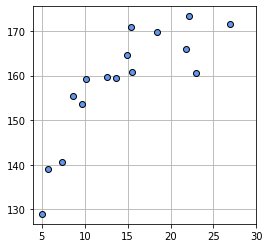

In [ ]:
# 생성한 Data set을 그래프에 표시
plt.figure(figsize=(4,4))
plt.plot(X,T,marker='o', linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

이제부터 각 점의 평균을 관통하는 직선을 찾을 것이다.
직선은 다음과 같이 나타낼 수 있다. 

$$y(x) = w_0x + w_1$$

직선은 기울기와 y절편의 값에 따라 결정된다. 오차를 줄이기 위해 최적의 기울기와 y절편의 값을 구할 것이다. 
각 점에서 직선까지의 거리가 가장 짧도록 직선을 위치시킨다. 각 점에서 직선까지의 거리의 평균 값을 구한다.

평균제곱오차 $ J =\displaystyle\frac{1}{N}\displaystyle\sum_{n=0}^{N-1} (y_n - t_n)^2$


In [ ]:
# 각 점에서 직선까지의 평균제곱오차를 계산하는 함수
from mpl_toolkits.mplot3d import Axes3D
def mse_line (x,t,w):
  # 기울기가 w[0], y절편이 w[1]인 직선이 입력되면, 각 점에서 그 직선까지의 거리의 평균을 구한다. 
  y = w[0] * x + w[1]
  mse = np.mean((y-t)**2)
  return mse

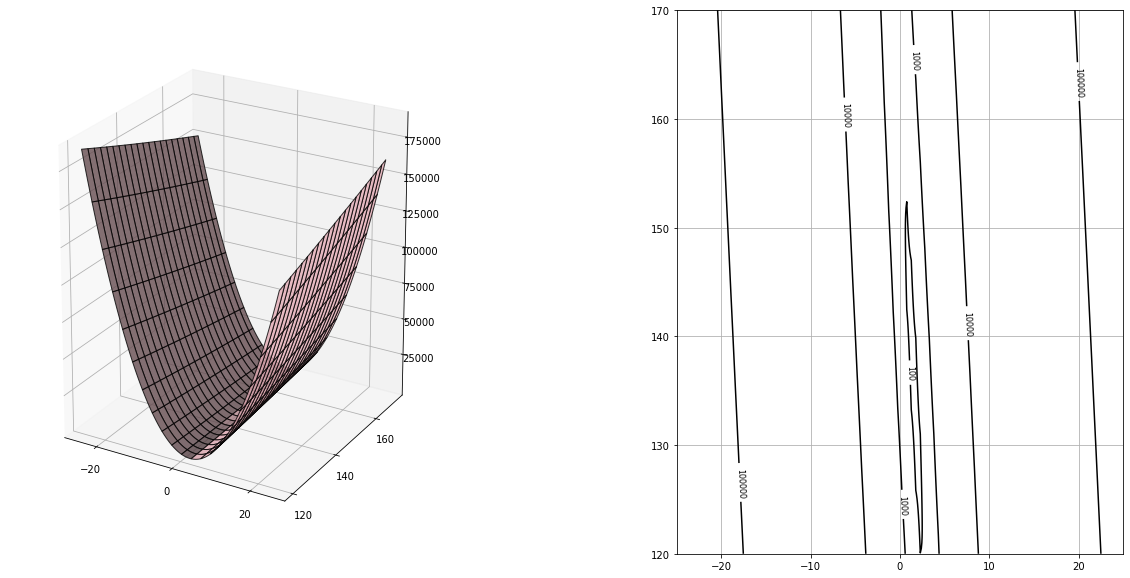

In [ ]:
# 직선의 기울기 w[0]과 y절편 w[1]값에 따른 평균제곱오차 J의 분포를 그래프로 나타냄
# 기울기의 범위를 -25 ~ +25로 설정
# y절편의 범위를 120 ~ 170으로 설정
wn = 100
w0_range = [-25,25]
w1_range = [120,170]
w0 = np.linspace(w0_range[0],w0_range[1],wn)
w1 = np.linspace(w1_range[0],w1_range[1],wn)
ww0, ww1 = np.meshgrid(w0,w1)
J = np.zeros((len(w0),len(w1)))

for i0 in range(wn):
  for i1 in range(wn):
    J[i1,i0] = mse_line(X,T,(w0[i0],w1[i1]))

plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.5)
ax=plt.subplot(1,2,1,projection='3d')
ax.plot_surface(ww0,ww1,J,rstride=5,cstride=5,alpha=0.8,color='pink', edgecolor='black')
ax.set_xticks([-20,0,20])
ax.set_yticks([120, 140, 160])
ax.view_init(20,-60)

plt.subplot(1,2,2)
cont=plt.contour(ww0,ww1,J,30,colors='black',levels=[100,1000,10000,100000])
cont.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)
plt.show()

그래프로 기울기와 y절편을 어떻게 설정해주어야 최적의 직선이 나오는지 알아봤다.
이제 최적의 기울기와 y절편을 구해보자

평균제곱오차 J를 편미분하면 면의 기울기가 나온다. 

$$ J = \frac{1}{N}\displaystyle\sum_{n=0}^{N-1} (y_n - t_n)^2 =\frac{1}{N}\displaystyle\sum_{n=0}^{N-1} (w_0x_n + w_1 - t_n)^2$$

$$\frac{\partial J}{\partial w_0} = \frac{2}{N}\displaystyle\sum_{n=0}^{N-1} (w_0x_n + w_1 - t_n)x_n = \frac{2}{N}\displaystyle\sum_{n=0}^{N-1} (y_n - t_n)x_n$$


$$\frac{\partial J}{\partial w_1} = \frac{2}{N}\displaystyle\sum_{n=0}^{N-1} (w_0x_n + w_1 - t_n) = \frac{2}{N}\displaystyle\sum_{n=0}^{N-1} (y_n - t_n)$$
초기 값을 찍고 그 점에서 J값의 기울기를 구해 점점 줄어드는 방향으로 점을 이동시킨다.

점을 계속 이동시키면 결국 J의 기울기가 0인 극소값에 도달하게 된다. 

그 극소값에서의 $w_0$(기울기)과 $w_1$(y절편)값을 구한다. 

In [ ]:
# 평균 제곱 오차의 기울기
def dmse_line(x,t,w):
  y = w[0] * x + w[1]
  d_w0 = 2 * np.mean((y - t) * x) # J를 w0에 대해서 편미분한 값, 즉 J그래프에서 w0 방향으로의 기울기
  d_w1 = 2 * np.mean(y-t) # J를 w1에 대해서 편미분한 값, 즉 J그래프에서 w1 방향으로의 기울기
  return d_w0, d_w1

In [ ]:
# 기울기가 10이고 y절편이 165인 직선을 넣었을 때, w0방향, w1방향 모두 기울기가 크게 나온다. 
# 최적점을 찾기 위해서는 기울기와 y절편을 조절해야한다.
d_w = dmse_line(X, T, [10,165])
print(np.round(d_w,1))

[5046.3  301.8]


In [ ]:
# 경사 하강법
def fit_line_num(x,t): 
  w_init = [10.0, 165.0] # 초기 매개 변수, 초기 직선의 형태
  alpha = 0.001 # 학습률
  i_max = 100000 # 반복의 최대 횟수
  eps = 0.1 # 해당 값보다 기울기가 낮다면 반복을 종료한다. 

  w_i = np.zeros([i_max, 2]) # 10000행 2열의 배열 생성, w값으 변화를 기록하는 2차원 배열
  w_i[0, :] = w_init # 일단 초기 직선형태(좌표)로 배열을 전부 세팅
  for i in range(1, i_max) : 
    dmse = dmse_line(x, t, w_i[i-1]) # 해당 좌표(기울기, y절편)에서의 기울기 계산 
    w_i[i, 0] = w_i[i-1, 0] - alpha * dmse[0] # 기울기만큼 좌표를 이동시킴
    w_i[i, 1] = w_i[i-1, 1] - alpha * dmse[1]
    if max(np.absolute(dmse)) < eps: # eps보다 기울기가 낮으면 반복을 종료한다.
        break
  w0 = w_i[i,0]
  w1 = w_i[i,1]
  w_i = w_i[:i, :]
  w = [w0, w1]
  return w,dmse,w_i

반복횟수 = 13820


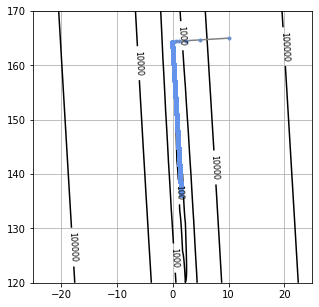

In [ ]:
# 등고선을 보여주는 함수
def show_contour(ax, x, t) : 
  xn = 100
  w0_range = [-25,25]
  w1_range = [120, 170]
  x0 = np.linspace(w0_range[0], w0_range[1], xn)
  x1 = np.linspace(w1_range[0], w1_range[1], xn)
  xx0, xx1 = np.meshgrid(x0,x1)
  J=np.zeros((len(x0), len(x1)))
  for i0 in range(xn) : 
    for i1 in range(xn) :
      J[i1, i0] = mse_line(x, t, (x0[i0], x1[i1]))
  cont = plt.contour(xx0, xx1, J, 30, colors='black', levels = (100, 1000, 10000, 100000))
  cont.clabel(fmt='%1.0f', fontsize=8)
  plt.grid(True)

# 메인 함수
    
Ax = plt.figure(figsize=(5,5))
show_contour(Ax,X,T)
# 경사 하강법 호출
W, dMSE, W_history= fit_line_num(X, T)
# 결과 보기 
print('반복횟수 =', W_history.shape[0])
plt.plot(W_history[:,0], W_history[:,1], '.-', color='gray', markeredgecolor='cornflowerblue')
plt.show()

w0 = { 1.5399473562672923 }, w1 = { 136.1761603274906 }
SD = { 7.001960569290233 } cm


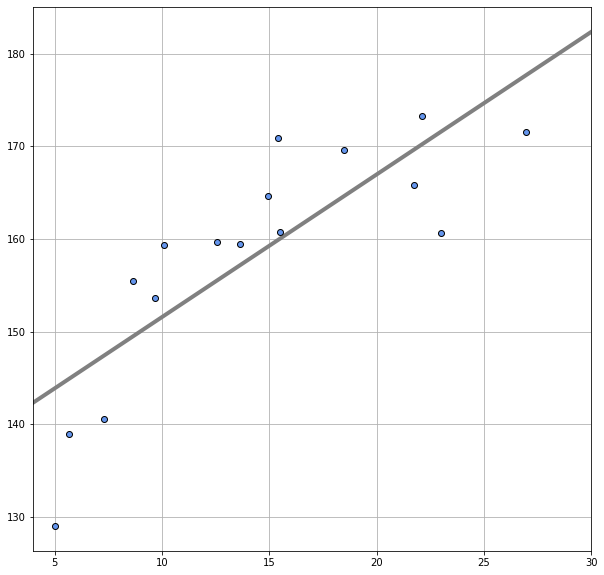

In [ ]:
# 처음 그래프에 선 표시하기
def show_line(w) : 
  xb = np.linspace(X_min, X_max, 100)
  y = w[0] * xb + w[1]
  plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)

# 메인
plt.figure(figsize=(10,10))
mse = mse_line(X,T,W) # 해당 직선의 평균제곱오차를 구한다.
print('w0 = {',W[0],'}, w1 = {',W[1],'}') 
print('SD = {',np.sqrt(mse),'} cm') 
show_line(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

> 수치해

일반적으로 경사 하강법으로 구해지는 해는 어디까지나 극소값이며, 전체의 최솟값은 아니다. 
만약 평균제곱오차$J$가 극소값을 여러 개 가진다면, 최소 제곱법으로는 초기값 근처의 함몰 지점에 수렴하게 된다. 따라서 $J$가 복잡한 모양을 하고 있을 때, 최소값을 구하는 것은 어려운 문제이다. 따라서 다양한 초기 값에서 경사 하강법을 여러 번 시도하여, 그 중 가장 작은 $J$를 찾는 근사적인 방법을 사용할 수 있다. 

그러나 이번 문제에서는 $J$가 $w_0$과 $w_1$ 두 개의 변수를 사용하는 2차 함수로 되어 있기 때문에, $J$는 함몰이 하나 밖에 없는 '그릇형'이 '보증'된다. 따라서 어떤 초기 값에서 시작하더라도 전체의 최솟값으로 수렴한다. 



> 해석해

수치해는 경사 하강법을 통해 구한 답이다.

그러나 사실 직선 모델에서는 근사적인 해석이 아니라 방정식을 사용하여 정확한 해를 구할 수 있다.(극소값이 전체를 통틀어 하나이기 때문)
이러한 풀이를 `해석해`라고 한다.

해석해를 사용하면 경사하강법 반복 계산이 아니라 1회 계산으로 정확한 직선을 구할 수 있다. 

해석해의 아이디어는 '극소값의 기울기는 0'이라는 사실이다. 
따라서 $J$를 $w_0$, $w_1$에 대해서 각각 편미분했을 때 나오는 기울기가 0인 지점을 찾는다.

$$\frac{\partial J}{\partial w_0} = \frac{2}{N}\displaystyle\sum_{n=0}^{N-1} (w_0x_n + w_1 - t_n)x_n = 0$$


$$\frac{\partial J}{\partial w_1} = \frac{2}{N}\displaystyle\sum_{n=0}^{N-1} (w_0x_n + w_1 - t_n) = 0$$


w0 = { 1.5399473562672923 }, w1 = { 136.1761603274906 }
SD = { 7.000871041730357 } cm


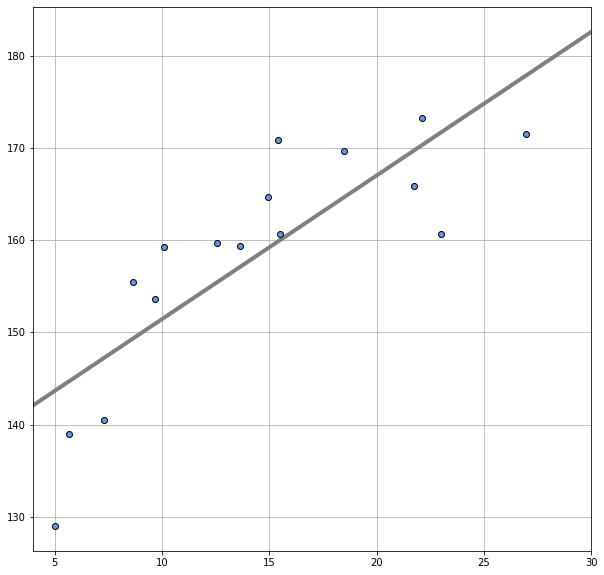

In [ ]:
# 해석해
def fit_line(x, t) :
  mx = np.mean(x)
  mt = np.mean(t)
  mtx = np.mean(t*x)
  mxx = np.mean(x*x)
  w0 = (mtx - mt * mx) / (mxx - (mx)**2)
  w1 = mt - w0 * mx
  return np.array([w0,w1])

# 메인
plt.figure(figsize=(10,10))
W= fit_line(X,T)
mse = mse_line(X,T,W) # 해당 직선의 평균제곱오차를 구한다.
print('w0 = {',W0,'}, w1 = {',W1,'}') 
print('SD = {',np.sqrt(mse),'} cm') 
show_line(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

경사 하강법보다 더 적합한 매개 변수 W를 얻었음을 알 수 있다.

## `5.2` 2차원 입력면 모델

1차원의 경우는 xn이 나이만을 의미했지만, 이와함께 몸무게 정보도 사용하여 키를 예측한다.

In [ ]:
# 몸무게에 대한 벡터 X1를 생성
X0 = X # 입력 벡터 : 나이
X_n = 16 # 총 인원 수 
X0_min = 5 
X0_max = 30
X1_min = 40
X1_max = 75
np.random.seed(seed=1)
X1 = 23 * (T / 100)**2 + 2 * np.random.randn(X_n) # 입력 벡터 : 몸무게
print(X0)
print(X1)
print(T) # 출력 벡터 : 키

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]
[70.4323187  58.1547777  37.21918256 56.51449493 57.31720318 40.83915269
 57.79206169 56.93837017 63.03129677 65.69415428 62.32983909 64.94508118
 57.72983681 66.8939307  46.67837662 61.08315123]
[170.91013145 160.67559882 129.00206616 159.70139552 155.46058905
 140.56134369 153.65466385 159.42939554 164.70423898 169.64527574
 160.71257522 173.28709855 159.31193249 171.51757345 138.9570433
 165.8744074 ]


In [ ]:
# 2차원 데이터를 표시하는 함수
def show_data2(ax, x0, x1, t) : 
  ax.plot(x0,x1,t,'o',color='cornflowerblue',markeredgecolor='black',markersize=6,markeredgewidth=0.5) # 좌표 찍기
  ax.view_init(elev=30, azim=150) # 처음 각도 설정
  for i in range(len(x0)) : 
    ax.plot([x0[i], x0[i]], [x1[i],x1[i]], [120,t[i]],color='gray') # 보조선 생성
  

# 메인 함수
plt.figure(figsize=(10,10))
Ax = plt.subplot(1,1,1,projection='3d')
show_data2(Ax,X0,X1,T)
plt.show()

In [ ]:
# 임의의 면을 그리는 함수
def show_plane(ax, w) : 
  px0 = np.linspace(X0_min, X0_max, 5)
  px1 = np.linspace(X1_min, X1_max, 5)
  px0, px1 = np.meshgrid(px0,px1)
  y = w[0] * px0 + w[1] * px1 + w[2]
  ax.plot_surface(px0,px1,y,rstride = 1, alpha=0.3, color='pink', edgecolor='black')

# 면의 MSE
def mse_plane(x0, x1, t, w) : 
  y = w[0] * x0 + w[1] * x1 + w[2]
  mse = np.mean((y-t)**2)
  return mse

#  메인
plt.figure(figsize=(10,10))
ax=plt.subplot(1,1,1,projection='3d')
W=[-0.875, 2.93, 0]
show_plane(ax,W)
show_data2(ax,X0,X1,T)
mse=mse_plane(X0,X1,T,W)
print('SD = {',np.sqrt(mse),'} cm')
plt.show()

2차원 면 모델의 경우 다음과 같이 나타낼 수 있다. 
$$
y(x) = w_0x_0 + w_1x_1+ w2
$$
$w_0, w_1, w_2$ 값을 조정하면서 다양한 면 모델을 만들 수 있다.

그러면 데이터에 가장 적합한 $[w_0, w_1, w_2]$를 찾아보자, 1차원 입력 직선모델과 마찬가지로 평균제곱함수 $J$를 사용한다. 
$$ 
J = \frac{1}{N}\displaystyle\sum_{n=0}^{N-1} (y(x_n) - t_n)^2 =\frac{1}{N}\displaystyle\sum_{n=0}^{N-1} (w_0x_{n,0} + w_1x_{n,1} + w_2 - t_n)^2
$$
$w$를 움직이면 면이 여러 방향을 향하며 그에 따라 $J$가 변화한다. 목표는 $J$가 가장 작아지는 $[w_0, w_1, w_2]$를 구하는 것이다. $J$를 최소화하는 최적의 $w$는 $J$의 모든 방향의 기울기가 0일 때이다. 따라서 모든 방향(모든 $w$)의 변화에 대하여 $J$의 변화는 0이다. $J$를 $[w_0, w_1, w_2]$ 각각으로 편미분한 값이 0인 지점을 찾으면 된다. 

$$
\frac{\partial J}{\partial w_0} = 0
$$

$$
\frac{\partial J}{\partial w_1} = 0
$$

$$
\frac{\partial J}{\partial w_2} = 0
$$
</br>
</br>
</br>
위 세 식을 전개하면 $w$를 다음과 같이 정리할 수 있다. 
</br>
$$
  w_0 = \frac{cov(t, x_1)cov(x_0, x_1) - var(x_1)cov(t,x_0)}{cov(x_0,x_1)^2 - var(x_0)var(x_1)}
$$

$$
  w_1 = \frac{cov(t, x_0)cov(x_0, x_1) - var(x_0)cov(t,x_1)}{cov(x_0,x_1)^2 - var(x_0)var(x_1)}
$$

$$
  w_2 = -w_0< x_0 > - w_1 < x_1 > + < t >
$$

$< t >$ 는 $t_n$의 평균을 의미한다. 
$<t> =  \displaystyle\frac{1}{N}\displaystyle\sum_{n=0}^{N-1} t_n$


In [ ]:
# J를 w0, w1, w2 방향으로 편미분하여 w0, w1, w2 값을 구하는 함수
def fit_plane(x0,x1,t) : 
  c_tx0 = np.mean(t*x0) - np.mean(t) * np.mean(x0)
  c_tx1 = np.mean(t*x1) - np.mean(t) * np.mean(x1)
  c_x0x1 = np.mean(x0*x1) - np.mean(x0) * np.mean(x1)
  v_x0 = np.var(x0)
  v_x1 = np.var(x1)
  w0 = (c_tx1 * c_x0x1 - v_x1*c_tx0) / (c_x0x1 **2 - v_x0 * v_x1)
  w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1 ** 2 - v_x0 * v_x1)
  w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
  return np.array([w0, w1, w2]) 

# 메인
plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1,projection = '3d')
W = fit_plane(X0, X1, T)
print('w0 =', W[0])
print('w1 =', W[1])
print('w2 =', W[2])
show_plane(ax,W)
show_data2(ax,X0,X1,T)
mse = mse_plane(X0, X1, T, W)
print("SD = ",np.sqrt(mse))
plt.show()

## `5.3` 다차원 선형 회귀 모델

1차원, 2차원이 아닌 그 이상의 차원을 한 번에 생각해본다. $D$차원 입력을 일반화하면 다음과 같다.
$$
y(x) = w_0x_0 + w_1x_1 + \dots + w_{D-1}x_{D-1} 
$$

$$
y(x) = w_0x_0 + w_1x_1 + \dots + w_{D-1}x_{D-1} = [w_0 \dots w_{D-1}]\begin{bmatrix}
x_0  \\
\vdots  \\
x_{D-1}
\end{bmatrix}  = [x_0 \dots x_{D-1}]\begin{bmatrix}
w_0  \\
\vdots  \\
w_{D-1}
\end{bmatrix} = {\bf  w}^T{\bf x}
$$

$$
{\bf w}^T = [w_0 \dots w_{D-1}]^T = \begin{bmatrix}
w_0  \\
\vdots  \\
w_{D-1}
\end{bmatrix}
$$

### 매개 변수의 해석해

해석해를 구하기 위해서는 우선, 평균제곱오차 함수를 미분하여 기울기가 0이 되도록하는 $w$값을 찾아야 한다. 

각각의 $y(x)$를 각각의 $w$에 대해 미분하여 0으로 둔다.
$$ 
J({\bf w}) = \frac{1}{N}\displaystyle\sum_{n=0}^{N-1} (y(x_n) - t_n)^2 =\frac{1}{N}\displaystyle\sum_{n=0}^{N-1} ({\bf w}^T{\bf x}_n - t_n)^2
$$

$$ 
\frac{\partial J}{\partial w_i} = \frac{1}{N}\displaystyle\sum_{n=0}^{N-1} ({\bf w}^T{\bf x}_n - t_n)^2 =\frac{2}{N}\displaystyle\sum_{n=0}^{N-1} ({\bf w}^T{\bf x}_n - t_n)x_{n,i}
$$

$$ 
\frac{2}{N}\displaystyle\sum_{n=0}^{N-1} ({\bf w}^T{\bf x}_n - t_n)x_{n,i} = 0
$$

$$ 
\displaystyle\sum_{n=0}^{N-1} ({\bf w}^T{\bf x}_n - t_n)x_{n,i} = 0
$$

$i$를 $0$ ~ ${D-1}$까지 조정해가며 $D$개의 연립방정식을 푼다. 
$$ 
\displaystyle\sum_{n=0}^{N-1} ({\bf w}^T{\bf x}_n - t_n)x_{n,0} = 0
$$
$$ 
\displaystyle\sum_{n=0}^{N-1} ({\bf w}^T{\bf x}_n - t_n)x_{n,1} = 0
$$
$$
\vdots
$$
$$ 
\displaystyle\sum_{n=0}^{N-1} ({\bf w}^T{\bf x}_n - t_n)x_{n,D-1} = 0
$$
이러한 식들을 벡터 하나로 묶어 나타낼 수 있다. 

$$ 
\displaystyle\sum_{n=0}^{N-1} ({\bf w}^T{\bf x}_n - t_n)[x_{n,0}, x_{n,1} \dots x_{n,D-1}] = [0,0,\dots 0]
$$
$$ 
\displaystyle\sum_{n=0}^{N-1} ({\bf w}^T{\bf x}_n - t_n){\bf x}_n^T = [0,0,\dots 0]
$$

그러면 위 식을 다음과 같은 식으로 변환할 수 있다. 

$$
{\bf w}^T{\bf X}^T{\bf X} - {\bf t}^T{\bf X} = [0,0,\dots 0]
$$
정리하면 다음과 같다.
$$
{\bf w} = ({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf t} 
$$

위의 식을 이용하면 $x$가 어떤 차원이라도 최적의 $w$를 얻을 수 있다. 이 식을 '무어-펜로즈 의사 역행렬'이라고 한다.

단, 해당 식은 절편이 없는(항상 원점을 지나는) 모델로 그려진다. 원점을 지나지 않게 하기 위해서 $D$차원의 요소를 하나 추가해야 한다. 이 때 추가하는 $D$차원의 요소는 모든 원소를 1로 설정하여 $w_D$를 절편으로 표현할 수 있다. 
$D = 2$를 예로 들면 다음과 같다. 

$$
y(x) = w_0x_0 + w_1x_1+ w2x_2 = w_0x_0 + w_1x_1+ w_2
$$

따라서 항상 1을 취하는 차원($x_D$)을 입력 데이터 $x$에 추가한다면, 원점에 얽매이지 않는 면을 구할 수 있다.

In [ ]:
# 무어-펜로즈 의사 역행렬을 구하는 함수
# X를 입력해주면, t값에 맞게 적합한 w 벡터를 구해준다. 
def fit_demension(X,t) :
  Xt = X.transpose()
  XtX = Xt.dot(X)
  XtX_inv = np.linalg.inv(XtX)
  W = XtX_inv.dot(Xt).dot(t)
  W = W.transpose()
  return W[0]

# D차원의 벡터를 [1,1, ... 1]의 배열로 만들어 삽입한다. 
X2 = np.ones(16)
X = np.array([X0,X1,X2]).transpose()
Tt = np.array([T]).transpose()
W = fit_demension(X,Tt)

## `5.4` 선형 기저 함수 모델
직선을 사용하는 것보다 곡선을 사용하면 오차를 줄일 수 있다. 곡선을 나타내는 모델은 여러가지가 있지만 그 중에서 '선형 기저 함수 모델'을 사용한다. 

선형 회귀 모델의 $x$를 다른 기저 함수로 대체하는 것이 선형 기저 함수 모델의 아이디어이다.

그 중에서도 우리는 `가우스 함수`를 기저 함수로 사용한다.

$$
\phi_j(x) = exp\left\{ -\frac{(x-\mu_j)^2}{2s^2} \right\}
$$
$\mu_j$ : 가우스 함수의 중심 위치</br>
$s$ : 확장 정도, 설계자가 결정하는 매개 변수



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

colors = ['red','orangered','orange','gold','yellow','chartreuse','green','cyan','blue','navy','indigo']

# 데이터 로드
outfile = np.load('ch_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']

In [ ]:
# 가우스 함수
def gauss(x, mu, s) : 
  # mu = 가우시안 그래프의 중간 값
  # s = 중간에서 퍼지는 정도
  # x = 데이터
  return np.exp(-(x - mu)**2 / (2 * s**2))

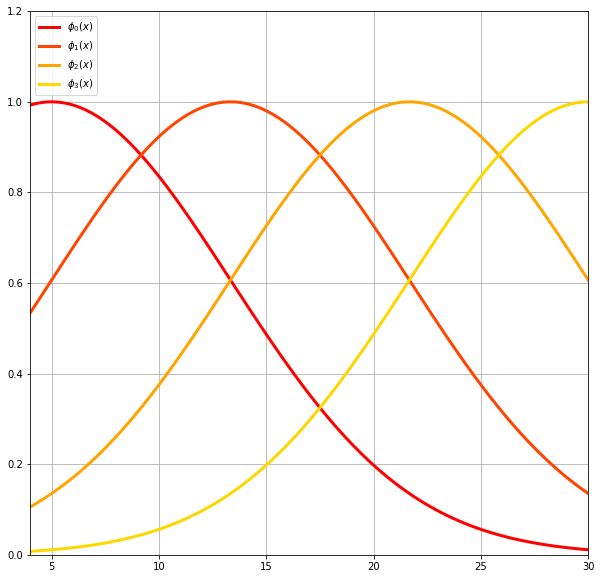

In [ ]:
M = 4
plt.figure(figsize=(10,10))
mu = np.linspace(5, 30, M) # mu 값은 구간을 얼마나 나누느냐, 즉 M을 어떻게 설정하느냐에 따라 종속적이다. 
s = mu[1] - mu[0] # s도 그냥 구간과 구간 사이로 주었다. 
xb = np.linspace(X_min, X_max, 100)
for j in range (M) :
  y = gauss(xb, mu[j], s)
  ax = plt.plot(xb, y, color=colors[j], linewidth=3, label='$\phi_'+str(j)+'(x)$')
plt.legend(loc='upper left')
plt.grid(True)
plt.xlim(X_min,X_max)
plt.ylim(0,1.2)
plt.show()

왼쪽에서 순서대로 $\phi_j(x)$라고 부른다.

이들에게 각각 매개변수 $w$를 곱해 모두 합한 함수를 다음과 같이 표기한다. 
$$
y(x,{\bf w}) = w_0\phi_0(x) + w_1\phi_1(x) + w_2\phi_2(x) + w_3\phi_3(x) + w_4
$$
이것이 $M = 4$ 의 선형 기저 함수 모델이다. 매개 변수 $w$를 '가중치 매개 변수'라고 하며, 이같은 계산을 '가중치를 붙여 더하면'이라고 표현한다. 마지막 $w_4$, 즉 $w_m$은 곡선 상하의 평행 이동을 조절한다. 따라서 $\phi$가 곱해지지 않았다. 이를 표현하기 위해 다음과 같은 더미 기초 함수를 추가한다. 
$$
\phi_M(x) = 1
$$
그러면 다음과 같이 깔끔하게 출력할 수 있다. 
$$ 
y({\bf x},{\bf w})= \displaystyle\sum_{j=0}^{M} w_j\phi_j({\bf x}) = {\bf w}^T{\bf \phi}({\bf x}) = \begin{bmatrix}\phi_0(x) &\cdots &\phi_{D-1}(x)\end{bmatrix}\begin{bmatrix}
w_0  \\
\vdots  \\
w_{D-1}
\end{bmatrix}
$$

$$ 
J({\bf w})=  \frac{1}{N}\displaystyle\sum_{n=0}^{N-1} ( y_n- t_n )^2=\frac{1}{N}\displaystyle\sum_{n=0}^{N-1} \left\{ {\bf w}^T{\bf \phi}({x_n}) - t_n \right\}^2
$$
이 식은 이전 선형 모델의 평균 제곱 오차와 비슷한 모양을 하고 있다. 
$$ 
J({\bf w}) = \frac{1}{N}\displaystyle\sum_{n=0}^{N-1} ({\bf w}^T{\bf x}_n - t_n)^2
$$
</br>
따라서 다음과 같은 사실을 알 수 있다.
> 
1. '전처리'로 1차원 데이터 ${\bf x_n}$을 $M$차원 데이터 벡터${\bf x_n = \phi}(x_n)$으로 변환
2. $M$차원 입력 $\bf {x}_n$에 대해 선형 회귀 모델을 적용
3. 즉, 선형 기저 함수 모델은 $\bf {\phi}(x_n)$를 입력$ {\bf x}_n $로 해석한 선형 회귀 모델과 같다.
$$
\therefore{\bf w} = ({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf t}  = (\boldsymbol{\Phi}^T\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^T{\bf t} 
$$

그러면, 최적의 매개 변수 w를 찾아보자

W2 =  [29.36124142 75.65751462  2.84803665 98.26053856 54.91146569]
W =  [29.38615946 75.66114072  2.86269022 98.27746408 54.88136904]
W =  [29.4 75.7  2.9 98.3 54.9]
SD =  3.978269445516622
SD2 =  3.9782694730350117


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


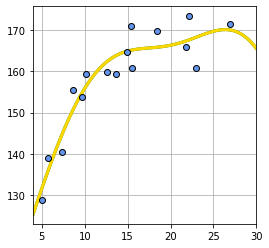

In [ ]:
# 선형 기저 함수 모델
def gauss_func(w, x):
  m = len(w) - 1 
  mu = np.linspace(5, 30, m) # mu 값은 구간을 얼마나 나누느냐, 즉 M을 어떻게 설정하느냐에 따라 종속적이다. 
  s = mu[1] - mu[0] # s값도 M에 종속적이다.
  y = np.zeros_like(x)
  for j in range(m) : 
    y = y + w[j] * gauss(x, mu[j], s)
  y = y+w[m]
  return y

# 선형 기저 함수 모델의 MSE를 계산하는 함수
# 특정 점에서 가우시안 함수 값을 구한 후 그 모든 점들에서의 표준 편차를 구한다.
def mse_gauss_func(x,t, w) : 
  y = gauss_func(w,x)
  # print('특정 점에서 가우시안 값 = ',y) # 특정 점에서 가우시안 함수 값
  # print('특정 점에서 실제 값 = ',t) # 특정 점에서 실제 값
  mse = np.mean((y-t)**2)
  return mse

def mse_gauss_fun2(w, x, t) : 
  y = gauss_func(w,x)
  # print('특정 점에서 가우시안 값 = ',y) # 특정 점에서 가우시안 함수 값
  # print('특정 점에서 실제 값 = ',t) # 특정 점에서 실제 값
  mse = np.mean((y-t)**2)
  return mse

# 원래 목적인 선형 기저 함수 모형의 매개 변수의 해석해(매개변수 W의 최적의 값)를 제공하는 함수
def fit_gauss_func(x, t, m) :
  mu = np.linspace(5,30,m)
  s = mu[1] - mu[0]
  n = x.shape[0]
  psi = np.ones((n,m+1))
  for j in range(m) :
    psi[:, j] = gauss(x,mu[j],s)
    # print('gauss [',j,'] = ',gauss(x,mu[j],s)) # 특정 x값이 가지는 [j]번째 가우시안 함수의 값, [Φ_j(x0), Φ_j(x1), Φ_j(x2), ... Φ_j(xn)]
  # print('psi = ', psi) # 특정 (n개 중)k번째 x값이 가지는 [1 ~ j]번째 가우시안 함수의 값, [Φ_1(xk), Φ_2(xk), Φ_3(xk), ... Φ_j(xk)]
  psi_T = np.transpose(psi)
  b = np.linalg.inv(psi_T.dot(psi))
  c = b.dot(psi_T)
  w = c.dot(t)
  return w

# 가우스 기저 함수 표시
def show_gauss_func(w,color) :
  xb = np.linspace(X_min, X_max, 100)
  y = gauss_func(w, xb)
  plt.plot(xb,y,c=[.5, .5, .5], lw = 3, color=color)

# optimize(minimize) 라이브러리를 활용한 w값 찾기
from scipy.optimize import minimize

def fit_model_func(w_init, x, t) :
  res0 = minimize(mse_gauss_fun2, w_init, args=(x,t), method='CG')
  # 리턴 값을 최소화할 목표 함수 : mse_model_A
  # 그 함수의 인자 : args=(x, t)
  # w의 초기 값 : w_init
  
  return res0.x # res1.x = mse를 최소화하는 w

# 메인
plt.figure(figsize=(4,4))
M = 4
W = fit_gauss_func(X, T ,M)
W_init = np.zeros(M+1)
W2= fit_model_func(W_init,X,T)
print('W2 = ',W2)
print('W = ',W)
show_gauss_func(W,'g')
show_gauss_func(W2,'gold')
plt.plot(X, T, marker='o', linestyle='None',color ='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
mse2 = mse_gauss_func(X,T,W2)
print('W = ',np.round(W,1))
print('SD = ',np.sqrt(mse))
print('SD2 = ',np.sqrt(mse2))

plt.show()

## `5.5` 오버피팅 문제
무조건적으로 $M$의 값을  늘린다고해서 좋은 피팅이 되는 것은 아니다. </br>
$M$의 값을 늘리면 선형 기저 함수가 각각의 점들에 집착하게 된다. 데이터 점이 없는 곳에는 뒤틀려 버린다. 따라서 새로운 데이터를 예측하는 것은 어려워진다. 이러한 문제를 `오버 피팅(over fiting)`이라고 한다. 

그러면 최적의 $M$을 찾아보자

그 전에 먼저 데이터 $X$ 중 1/4는 `테스트 데이터`로 나머지 3/4는 `훈련 데이터`로 나눈다. 그리고 모델의 최적 매개변수 $w$는 훈련 데이터만을 사용해서 찾는다. 
그리고 그렇게 찾은 최적 매개변수 $w$를 갖고 테스트 데이터의 평균 제곱 오차를 계산한다. 즉, 훈련에 이용하지 않은 미지의 데이터에 대한 예측 오차로 $M$을 평가한다. 

이러한 방법을 `홀드 아웃` 검증이라고 한다. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the s

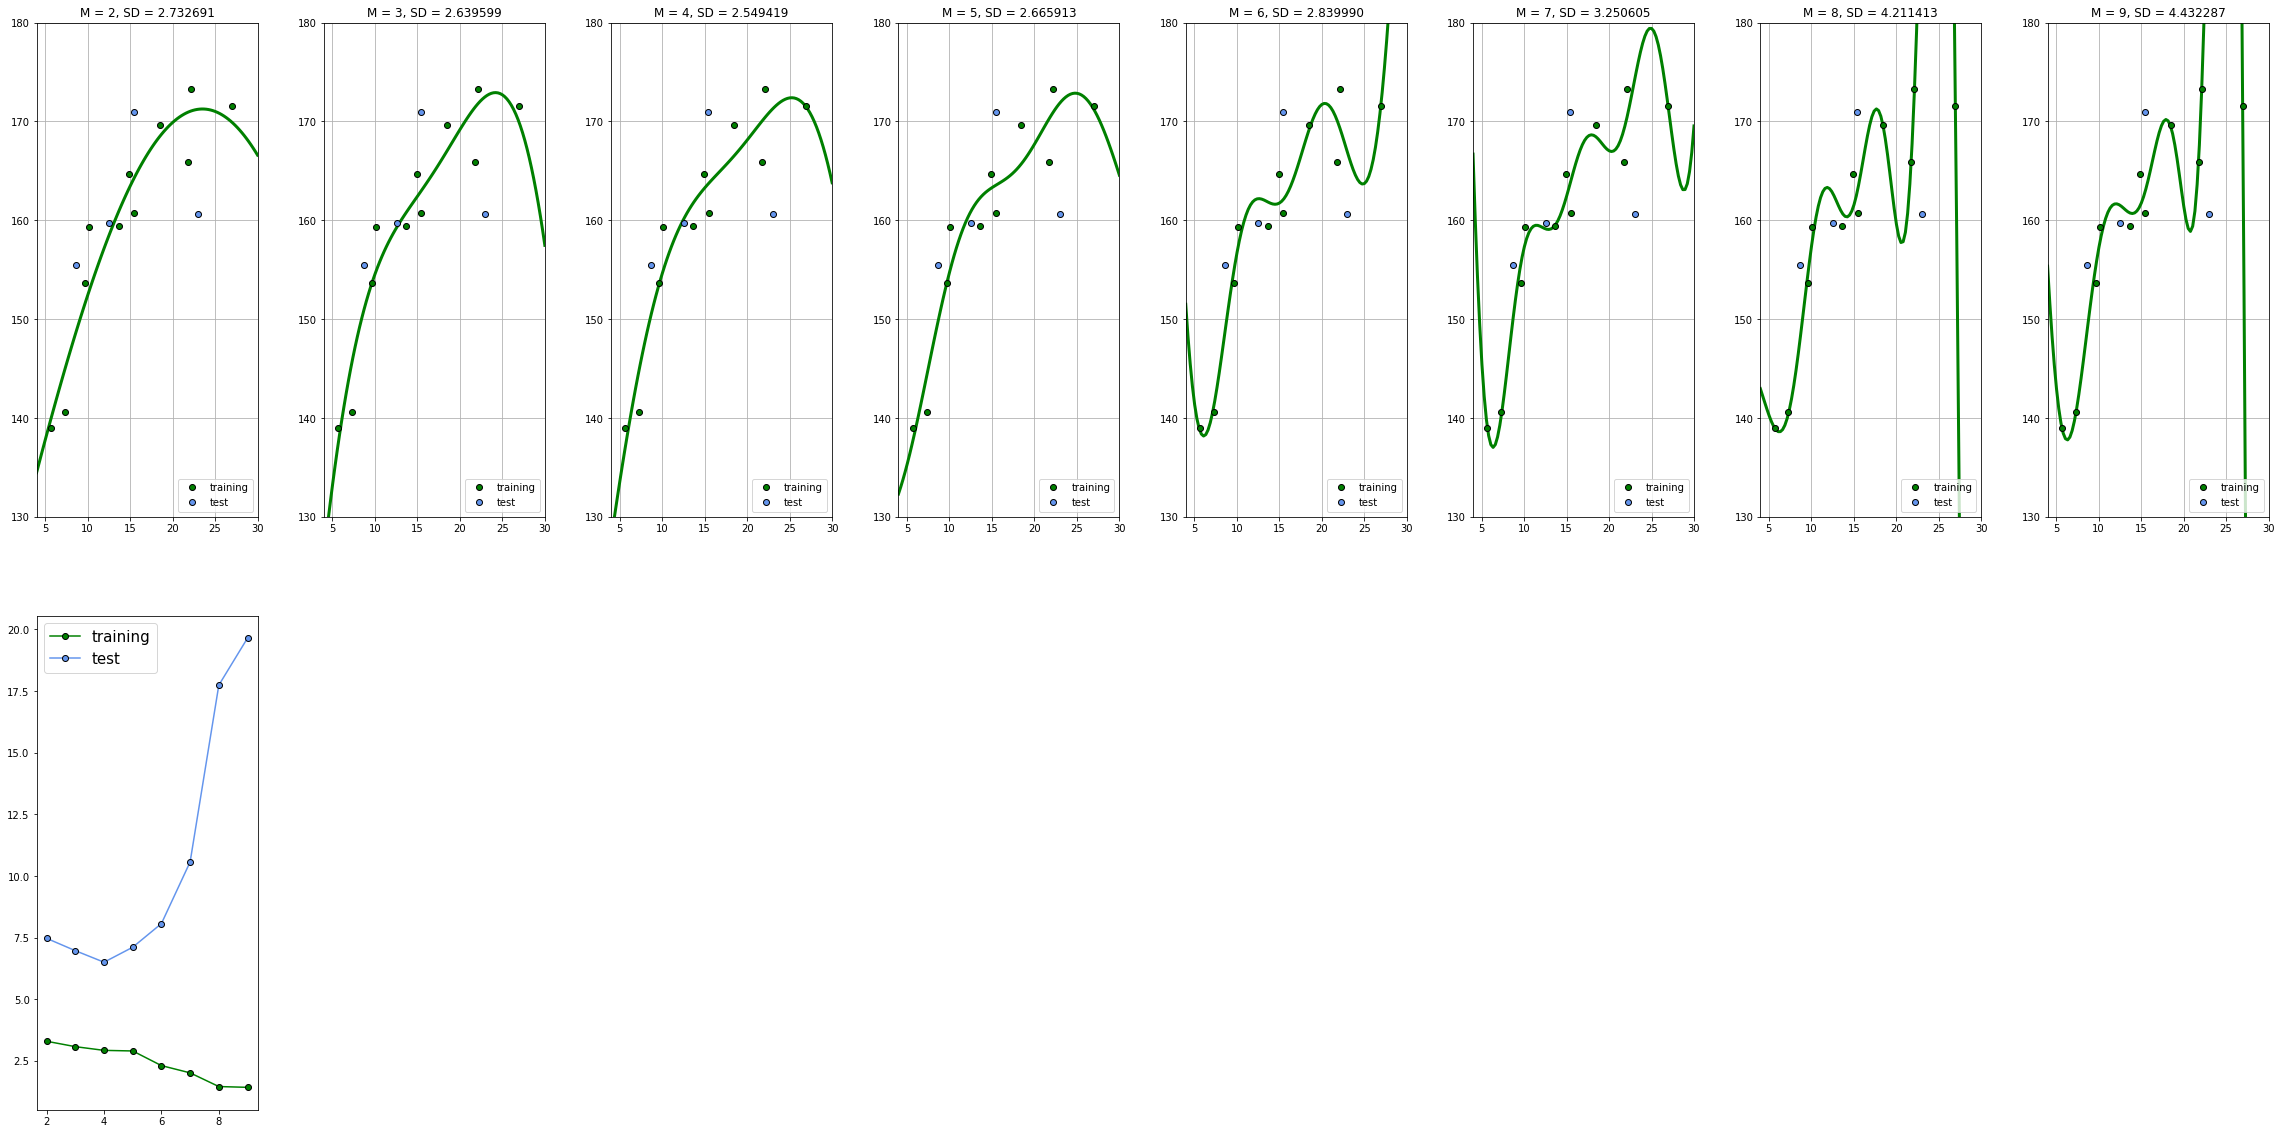

In [ ]:
# 훈련 데이터와 테스트 데이터 나누기
X_test = X[:int(X_n/4+1)]
T_test = T[:int(X_n/4+1)]
X_train = X[int(X_n / 4+1):]
T_train = T[int(X_n / 4+1):]

# 메인
plt.figure(figsize=(40,20))
plt.subplots_adjust(wspace=0.3)
M = range(2,10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M))
for i in range(len(M)):
  plt.subplot(2, len(M), i+1)
  W = fit_gauss_func(X_train, T_train, M[i])
  show_gauss_func(W)
  plt.plot(X_train, T_train, marker='o', linestyle='None',color='green',markeredgecolor='black',label='training')
  plt.plot(X_test, T_test, marker='o', linestyle='None',color='cornflowerblue',markeredgecolor='black',label='test')
  plt.legend(loc='lower right',fontsize=10, numpoints=1)
  plt.xlim(X_min, X_max)
  plt.ylim(130, 180) 
  plt.grid(True)
  mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
  mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
  plt.title("M = {:d}, SD = {:f}".format(M[i],np.sqrt(mse_test[i])))
plt.subplot(2,len(M),len(M)+1)
plt.plot(M, mse_train, marker='o', linestyle='-',color='green',markeredgecolor='black',label='training')
plt.plot(M, mse_test, marker='o', linestyle='-',color='cornflowerblue',markeredgecolor='black',label='test')
plt.legend(loc='upper left', fontsize=15)
plt.show()

$M$이 늘어나면 훈련 데이터의 오차는 평이하게 감소하지만, 테스트 데이터의 오차는 $M=4$까지 내려간 뒤 그 이후로부터는 증가한다. 즉 $M=5$일 때 오버피팅이 일어난다. 결과적으로 $M=4$일 때의 데이터가 가장 적합하다. 

그런데 또다른 문제가 발생한다. 훈련 데이터와 테스트 데이터를 어떻게 분류하는지, 즉 '분류법'에 따라 오차가 차이날 수 있다. 

이 차이를 최대한 줄이기 위해 `교차 검증`을 사용한다. 다양한 분할에서 오차를 내고 평균을 계산하는 방법이다. 

### 교차 검증 방법
1. 데이터 $X$와 $t$를 $K$개로 분류하여 첫번째 데이터를 테스트 데이터로, 나머지를 훈련 데이터로 한다. 
2. 훈련 데이터로부터 모델 $M$의 매개 변수를 구한다. 
3. 이 매개 변수를 사용하여 테스트 데이터의 평균 제곱 오차를 계산한다. 
4. 마찬가지로 두 번째 데이터를 테스트 데이터로 삼고 나머지를 훈련 데이터로 하여 테스트 데이터의 평균 제곱 오차를 구한다. 
5. 위와 같은 절차를 $K$번 반복한다.
6. 마지막에 $K$개의 평균 제곱 오차의 평균을 계산하여 이 숫자를 M의 평가 값으로 한다. 
(이 때 최대 분할 수는 $K = N$이며 테스트 데이터의 크기는 1이다, 이 경우를 특별히 LOOCV라고 한다. 데이터의 크기가 적을 때 이 방법을 사용한다.)

In [ ]:
# 먼저 데이터를 K 분할하여 각각의 평균 제곱 오차를 출력하자.
def kfold_gauss_func(x, t, m, k) : 
  n = x.shape[0] # 데이터 X의 개수
  mse_train = np.zeros(k)
  mse_test = np.zeros(k)
  for i in range(0,k) : 
    x_train = x[np.fmod(range(n),k)!=i] # n/k의 나머지가 i이 아닌 것들을 train set으로 삼는다.
    t_train = t[np.fmod(range(n),k)!=i] 
    x_test = x[np.fmod(range(n),k)==i] # n/k의 나머지가 i인 것들을 train set으로 삼는다.
    t_test = t[np.fmod(range(n),k)==i] 
    wm = fit_gauss_func(x_train, t_train, m) # training set을 활용하여 최적의 w를 찾는다. 
    mse_train[i] = mse_gauss_func(x_train, t_train, wm) # 구한 w를 갖고 training set의 오차를 구한다. 
    mse_test[i] = mse_gauss_func(x_test, t_test, wm) # 구한 w를 갖고 training set의 오차를 구한다. 
  return mse_train, mse_test

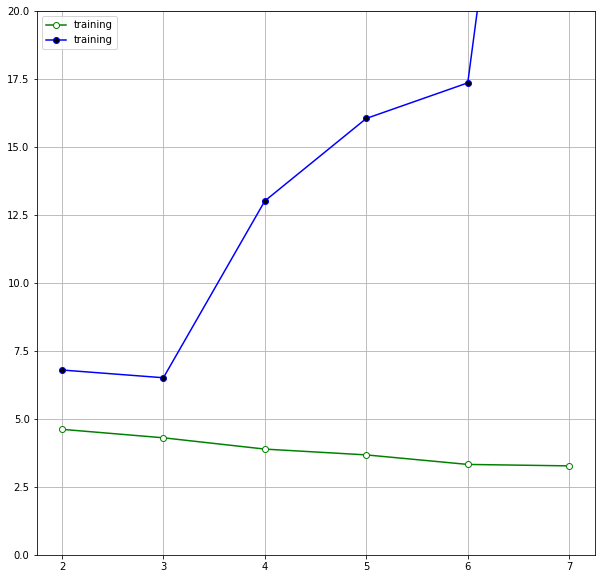

In [ ]:
# 그러면 이 kfold_gauss_func을 활용해서 최적의 M이 몇인지 찾아보자
# K는 최댓값인 16을 사용한다. 따라서 각각의 훈련 데이터의 크기는 1이다. 
M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K,len(M)))
Cv_Gauss_test = np.zeros((K,len(M)))
for i in range(0, len(M)) :
  Cv_Gauss_train[:,i], Cv_Gauss_test[:,i] = kfold_gauss_func(X,T,M[i],K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0)) # axis는 중심선을 기준으로 그러니까 axis=0이라는 것은 열을 기준으로 평균을 낸 것
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0)) # axis는 중심선을 기준으로 그러니까 axis=0이라는 것은 열을 기준으로 평균을 낸 것

plt.figure(figsize=(10,10))
plt.plot(M,mean_Gauss_train,marker='o',linestyle='-',color='g',markerfacecolor='w',label='training')
plt.plot(M,mean_Gauss_test,marker='o',linestyle='-',color='b',markerfacecolor='black',label='training')
plt.legend(loc="upper left", fontsize=10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

$M > 3$ 에서 과학습이 일어나고 있다. 
즉, LOOCV에서 $M=3$일 때 가장 적합하다는 결론이 도출된다. 홀드 아웃 검증과는 다르지만, 그보다 신뢰할 수 있다. 

교차 검증은 $M$을 구하기 위한 방법이며, 모델 매개 변수인 $w$를 구하는 용도가 아니다. 이제 최적의 $M$을 알고 있으므로 그것을 활용하여 $w$를 구하고, 그 $w$를 사용하여 그래프를 그려보자

SD =  4.367250211775641


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


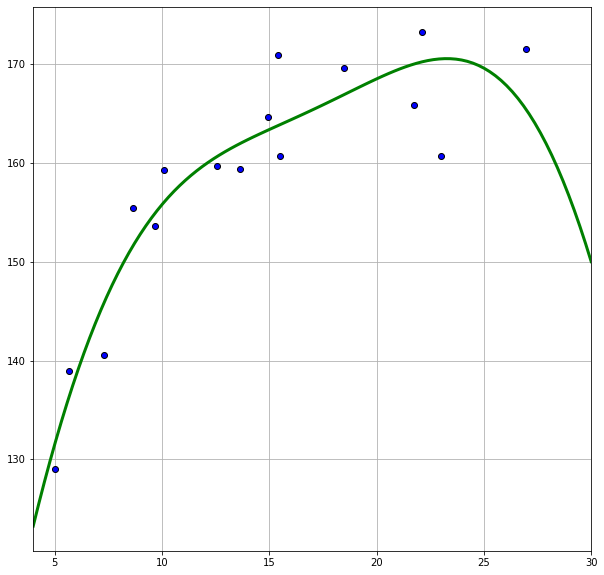

In [ ]:
M = 3
plt.figure(figsize=(10,10))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', color='blue', linestyle='None', markeredgecolor='black')
plt.xlim([X_min,X_max])
plt.grid(True)
mse = mse_gauss_func(X,T,W)
print("SD = ",np.sqrt(mse))
plt.show()

데이터 수가 적을 경우에는 교차 검증이 유리하다. 하지만 데이터 수가 많을 경우에는 교차 검증에 걸리는 시간이 길다. 이 경우에는 `홀드 아웃 검증`을 활용한다. 데이터 수가 크면, `홀드 아웃 검증`과 `교차 검증`에 걸리는 시간이 비슷하다. 

## `5.6` 새로운 모델의 생성
현재 예측 모델의 문제는 데이터가 부족해 25세 이후로 키가 급격하게 줄어든다는 것이다. 
일반적으로 사람의 키는 일정수준까지 증가한 뒤 수렴한다. 이 사실에 부합하는 모델을 새로 생성해보자 

$$
y(x) = w_0 - w_1exp(-w_2x)
$$
$x$가 증가하면 $\exp(-w_2x)$는 0에 근접한다. 그 결과 1항의 $w_0$값만 남게 된다. 즉, $x$가 증가하면 $y$는 $w_0$에 가까워진다. $w_0$은 수렴하는 값을 결정하는 매개변수이다. 
1. $w_0$ : 수렴하는 값을 결정하는 매개 변수
2. $w_1$ : 그래프의 시작점을 결정하는 매개 변수
3. $w_2$ : 그래프의 기울기를 결정하는 매개 변수




이제까지는 경사하강법을 이용하여 수치적으로 $w$를 구하는 방법(`수치해`)과, 해석적으로 도출하는 방법(`해석해`)를 소개했다. 이번에는 '수치 해석'라이브러리를 사용하여 w를 찾아보자 

함수의 최솟값 또는 최댓값을 구하는 문제는 '최적화 문제'라고 불린다. 이는 머신러닝뿐 아니라 더 넓은 분야에서 필요하며, 다양한 방법이 제안되어 있다. 그래서 최적화 문제를 푸는 라이브러리가 많이 개발되어 있다. 

파이썬의 'scipy.optimize'에 포함된 'minimize'함수를 사용한다. 
이 함수는 다음의 매개 변수를 필요로 한다.
1. 최솟값을 구하는 함수 
2. 매개 변수의 초기 값

(함수의 미분은 주지 않아도 된다)

In [ ]:
# 새로운 모델 A 
def model_A(x, w) : # x값과 w값을 주면 x값에 w를 매칭하여 y를 생성
  y = w[0] - w[1] * np.exp(- w[2] * x)
  return y

# 새로운 모델 A를 그래프에 표시 
def show_model_A(w) : 
  xb = np.linspace(X_min, X_max, 100)
  y= model_A(xb, w) # x배열과 w를 넘겨서 자동으로 y배열 생성
  plt.plot(xb,y,c=[.5,.5,.5], lw=4) 

# 모델 A의 MSE를 구하는 함수
def mse_model_A(w,x,t) : 
  y=model_A(x,w)
  mse = np.mean((y-t)**2)
  return mse

w0 =  169.04047101691262
w1 =  113.66091392813115
w2 =  0.21666034162495448
SD =  3.8618018777838263


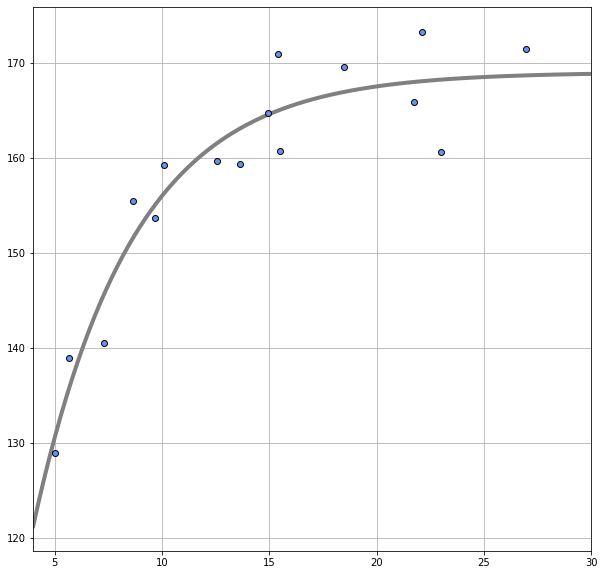

In [ ]:
from scipy.optimize import minimize

def fit_model_A(w_init, x, t) :
  res1 = minimize(mse_model_A, w_init, args=(x,t), method='powell')
  # 리턴 값을 최소화할 목표 함수 : mse_model_A
  # 그 함수의 인자 : args=(x, t)
  # w의 초기 값 : w_init
  
  return res1.x # res1.x = mse를 최소화하는 w

# 메인
plt.figure(figsize=(10,10))
W_init = [100,0,0]
W = fit_model_A(W_init, X, T)
print("w0 = ",W[0])
print("w1 = ",W[1])
print("w2 = ",W[2])

mse = mse_model_A(W,X,T)
print("SD = ",np.sqrt(mse))

show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)

plt.show()

##  `5.7` 모델의 선택
여러 모델이 있을 때 더 좋은 모델을 선택하는 방법은 모델들을 비교하는 것이다. 

모델 간의 비교에도 선형 기저 함수의 모델 M을 결정할 때와 같다. 미지의 데이터에 대한 예측 정확도로 평가한다. `홀드 아웃 검증`이나 `교차 검증`으로 모델의 좋고 나쁨을 평가할 수 있다. 

Gauss(M=3) Sd=6.51cm 
Model A SD = 4.72cm 


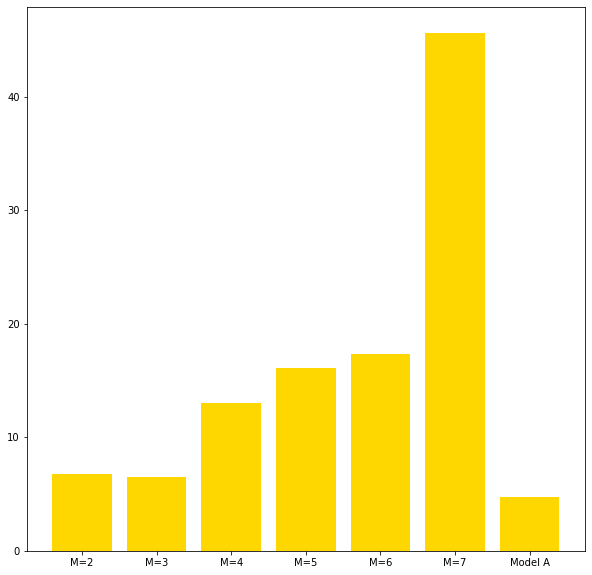

In [ ]:
def kfold_model_A(x, t, k) : 
  n = len(x)
  mse_train = np.zeros(k)
  mse_test = np.zeros(k)
  for i in range(0,k) : 
    x_train = x[np.fmod(range(n),k)!=i]
    x_test = x[np.fmod(range(n),k)==i]
    t_train = t[np.fmod(range(n),k)!=i]
    t_test = t[np.fmod(range(n),k)==i]
    wm = fit_model_A(np.array([169,113,0.2]),x_train,t_train)
    mse_train[i] = mse_model_A(wm, x_train, t_train)
    mse_test[i] = mse_model_A(wm, x_test, t_test)
  return mse_train, mse_test

# 메인
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) Sd={0:.2f}cm ".format(mean_Gauss_test[1]))
print("Model A SD = {0:.2f}cm ".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:6], mean_A_test)
M = range(7)
label = ["M=2","M=3","M=4","M=5","M=6","M=7","Model A"]
plt.figure(figsize=(10,10))
plt.bar(M,SD, tick_label= label, align="center", facecolor="gold")
plt.show()

## `5.8` 정리
'지도 학습 : 회귀'의 흐름
1. 데이터가 있다. 
2. 목적 함수를 결정한다. 
3. 모델의 후보를 결정한다.
4. 데이터를 테스트 데이터와 훈련 데이터로 나눈다.
5. 적용할 모델을 결정한다. 예를 들어, 직선 모델이 아니라 곡 모델을 사용하고 싶다면 가우스 함수를 채택한다.
6. 채택한 함수에 데이터를 넣고 평균제곱오차를 계산하는 식을 세운다.
7. 평균제곱오차를 미분하여 극소값을 찾는다. 그 극소값을 만드는 w가 최적 매개 변수이다. 
8. 새로운 데이터 x에 대한 예측 정확도에 따라, 최적 모델을 선택한다. 
